# IBM Applied Data Science Capstone Course by Coursera

### Week 5 Final Report

**_Opening a New Bookstore in Toronto, Canada_**

- Build a dataframe of neighborhoods in Toronto, Canada by web scraping the data from Wikipedia page,
- Get the geographical coordinates of the neighborhoods
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new bookstore

## 1. Obtaining the Location data
#### Importing Libraries

In [356]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### Scraping the webpage

In [357]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page=requests.get(url).text
soup = BeautifulSoup(page,'lxml')

### Storing the data in a pandas dataframe

In [358]:
table = soup.find('table')
fields = table.find_all('td')

postcode = []
borough = []
neighborhood = []

for i in range(0, len(fields), 3):
    postcode.append(fields[i].text.strip())
    borough.append(fields[i+1].text.strip())
    neighborhood.append(fields[i+2].text.strip())
        
df_pc = pd.DataFrame(data=[postcode, borough, neighborhood]).transpose()
df_pc.columns = ['Postcode', 'Borough', 'Neighborhood']
df_pc.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


### Removing empty cells

In [359]:
df_pc['Borough'].replace('Not assigned',np.nan,inplace=True)
df_pc.dropna(subset=['Borough'],inplace=True)
df_pc.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


### Grouping and Reindexing

In [360]:
df_pc1=df_pc.groupby(['Postcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_pc1.columns = ['PostalCode', 'Borough', 'Neighborhood']
df_pc1

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


### Assinging empty Neighborhood cells thier values 

In [361]:
for i in range(len(df_pc1['Neighborhood'])):
    if df_pc1['Neighborhood'][i]=='Not assigned':
        df_pc1['Neighborhood'][i]=df_pc1['Borough'][i]
df_pc1

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [362]:
df_pc1.shape

(103, 3)

## 2. Loading the Geographical Coordinates of the Neighborhoods

In [363]:
dfgeo = pd.read_csv("Geospatial_Coordinates.csv")
dfgeo.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
dfgeo

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


### Merging the dataframes

In [364]:
neighborhoods=pd.merge(df_pc1,dfgeo,on='PostalCode',how='left')
neighborhoods

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


### Use geopy library to get the latitude and longitude values of Toronto City.

In [365]:
address = 'Toronto'

geolocator = Nominatim(user_agent='tor_explorer')
location= geolocator.geocode(address)
latitude= location.latitude
longitude= location.longitude

print('The Geographical co-ordinates of Toronto city are {},{}'.format(latitude,longitude))

The Geographical co-ordinates of Toronto city are 43.6534817,-79.3839347


## 3.Create a map of Toronto with neighborhoods superimposed on top.

In [366]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## 4.Selecting neighborhoods in Old Town Toronto

In [367]:
df_toronto = neighborhoods[neighborhoods['Borough'].str.contains('Toronto')]
df_toronto.reset_index(inplace=True)
df_toronto.drop('index', axis=1, inplace=True)
df_toronto.head()

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,The Danforth West / Riverdale,43.679557,-79.352188
2,M4L,East Toronto,India Bazaar / The Beaches West,43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [368]:
df_toronto.shape

(39, 5)

In [369]:
print(df_toronto.groupby('Borough').count()['Neighborhood'])


Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64


In [370]:
#Create list with the Boroughs (to be used later)
boroughs = df_toronto['Borough'].unique().tolist()
boroughs

['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']

In [371]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3))
borough_color

{'East Toronto': '#F1C8FD',
 'Central Toronto': '#FD878B',
 'Downtown Toronto': '#9A3B56',
 'West Toronto': '#6B9A23'}

In [372]:
map_toronto1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'],df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill=True,
        fill_color=borough_color[borough],
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto1)  
    
map_toronto1

##  5.Use the Foursquare API to explore the neighborhoods

In [373]:
CLIENT_ID = 'STP5WL0EB5PKSGBNVDC4AS1KO1MDG4HHRYDJZ0Q5XGSSKA13' # your Foursquare ID
CLIENT_SECRET = '3SFNTBSMSJYT5I5F4FTNKDO3IUYKL3TQPPELLYWWPLHPJGVD' # your Foursquare Secret
VERSION = '20190605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: STP5WL0EB5PKSGBNVDC4AS1KO1MDG4HHRYDJZ0Q5XGSSKA13
CLIENT_SECRET:3SFNTBSMSJYT5I5F4FTNKDO3IUYKL3TQPPELLYWWPLHPJGVD


#### Define a function to obtain nearby venues

In [374]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [375]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

The Beaches
The Danforth West / Riverdale
India Bazaar / The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park / Summerhill East
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
Rosedale
St. James Town / Cabbagetown
Church and Wellesley
Regent Park / Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond / Adelaide / King
Harbourfront East / Union Station / Toronto Islands
Toronto Dominion Centre / Design Exchange
Commerce Court / Victoria Hotel
Roselawn
Forest Hill North & West
The Annex / North Midtown / Yorkville
University of Toronto / Harbord
Kensington Market / Chinatown / Grange Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst
 Quay / South Niagara / Island airport
Stn A PO Boxes
First Canadian Place / Underground city
Christie
Dufferin / Dovercourt Village
Little Portugal / Trinity
Brockton / Parkdale Village / Exhibition Place
High Park /

In [376]:
toronto_venues.shape

(1622, 7)

#### Let's check how many venues were returned for each neighorhood

In [377]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,55,55,55,55,55,55
Brockton / Parkdale Village / Exhibition Place,23,23,23,23,23,23
Business reply mail Processing CentrE,16,16,16,16,16,16
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst\n Quay / South Niagara / Island airport,14,14,14,14,14,14
Central Bay Street,64,64,64,64,64,64
Christie,18,18,18,18,18,18
Church and Wellesley,75,75,75,75,75,75
Commerce Court / Victoria Hotel,100,100,100,100,100,100
Davisville,34,34,34,34,34,34


#### Let's find out how many unique categories can be curated from all the returned venues

In [378]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 227 uniques categories.


In [379]:
# print out the list of categories
toronto_venues['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Greek Restaurant', 'Cosmetics Shop', 'Italian Restaurant',
       'Ice Cream Shop', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Pizza Place', 'Bookstore',
       'Restaurant', 'Dessert Shop', 'Juice Bar', 'Bubble Tea Shop',
       'Spa', 'Diner', 'Grocery Store', 'Furniture / Home Store', 'Café',
       'Coffee Shop', 'Bakery', 'Caribbean Restaurant',
       'Indian Restaurant', 'American Restaurant', 'Frozen Yogurt Shop',
       'Lounge', 'Liquor Store', 'Gym', 'Fish & Chips Shop',
       'Fast Food Restaurant', 'Sushi Restaurant', 'Park', 'Pet Store',
       'Steakhouse', 'Burrito Place', 'Movie Theater', 'Sandwich Place',
       'Fish Market', 'Gay Bar', 'Cheese Shop',
       'Middle Eastern Restaurant', 'Comfort Food Restaurant',
       'Thai Restaurant', 'Seafood Restaurant', 'Stationery Store',
       'Coworking Space', 'Wine Bar', 'Bar', 'Gym / Fitness Center',
       'Latin American Restaurant'

In [380]:
# check if the results contain "Bookstore"
"Bookstore" in toronto_venues['Venue Category'].unique()

True

## 6.Analyse each Neighborhood

In [381]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1622, 228)


,Neighborhoods,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [382]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(39, 228)


,Neighborhoods,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.0000,0.018182,0.000000,0.018182,0.036364,0.000000,0.000000,0.00,0.018182,0.018182,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.036364,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.036364,0.054545,0.000000,0.00000,0.000000,0.00,0.000000,0.018182,0.000000,0.018182,0.000000,0.018182,0.000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.00,0.000000,0.000000,0.036364,0.000000,0.000000,0

In [383]:
len(to_grouped[to_grouped["Bookstore"] > 0])

13

In [384]:
to_bs = to_grouped[["Neighborhoods","Bookstore"]]
to_bs

,Neighborhoods,Bookstore
0,Berczy Park,0.000000
1,Brockton / Parkdale Village / Exhibition Place,0.000000
2,Business reply mail Processing CentrE,0.000000
3,CN Tower / King and Spadina / Railway Lands / ...,0.000000
4,Central Bay Street,0.000000
5,Christie,0.000000
6,Church and Wellesley,0.013333
7,Commerce Court / Victoria Hotel,0.010000
8,Davisville,0.000000
9,Davisville North,0.000000


## 7.Clustering Neighborhoods

In [385]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = to_bs.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0])

### Determining the best K

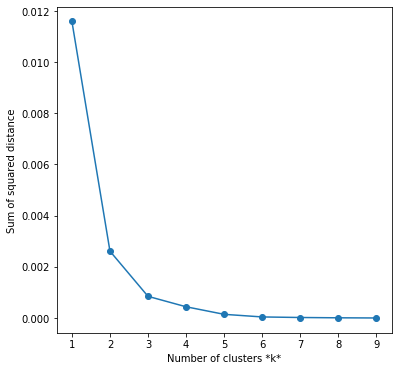

In [386]:
# Run the Kmeans algorithm and get the index of data points clusters
import matplotlib.pyplot as plt
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(to_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [387]:
to_merged = to_bs.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

,Neighborhood,Bookstore,Cluster Labels
0,Berczy Park,0.0,0
1,Brockton / Parkdale Village / Exhibition Place,0.0,0
2,Business reply mail Processing CentrE,0.0,0
3,CN Tower / King and Spadina / Railway Lands / ...,0.0,0
4,Central Bay Street,0.0,0


In [388]:
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(1622, 9)


,Neighborhood,Bookstore,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.0,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.0,0,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.0,0,43.644771,-79.373306,Meridian Hall,43.646292,-79.376022,Concert Hall
0,Berczy Park,0.0,0,43.644771,-79.373306,Starbucks,43.644285,-79.369771,Coffee Shop


In [389]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

,Neighborhood,Bookstore,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
17,Kensington Market / Chinatown / Grange Park,0.0,0,43.653206,-79.400049,Crimson Teas 堅信良茶,43.656953,-79.399449,Tea Room
17,Kensington Market / Chinatown / Grange Park,0.0,0,43.653206,-79.400049,Trinity Common,43.656590,-79.402761,Bar
17,Kensington Market / Chinatown / Grange Park,0.0,0,43.653206,-79.400049,A & C World,43.657409,-79.399847,Gaming Cafe
17,Kensington Market / Chinatown / Grange Park,0.0,0,43.653206,-79.400049,Alexandra Park,43.650583,-79.404538,Park


### Visualising the clusters

In [399]:
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=12)

# set color scheme for the clusters
x = np.arange(toclusters)
ys = [i + x + (i*x)**2 for i in range(toclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'],to_merged['Neighborhood'],to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [400]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

## 8.Examining the Clusters
### Cluster 1

In [391]:
col=['Neighborhood','Bookstore','Cluster Labels','Neighborhood Latitude','Neighborhood Longitude']

In [392]:
to_merged[col].loc[(to_merged['Cluster Labels'] == 0)].drop_duplicates()

,Neighborhood,Bookstore,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
0,Berczy Park,0.0,0,43.644771,-79.373306
17,Kensington Market / Chinatown / Grange Park,0.0,0,43.653206,-79.400049
18,Lawrence Park,0.0,0,43.728020,-79.388790
19,Little Portugal / Trinity,0.0,0,43.647927,-79.419750
21,North Toronto West,0.0,0,43.715383,-79.405678
23,Queen's Park / Ontario Provincial Government,0.0,0,43.662301,-79.389494
20,Moore Park / Summerhill East,0.0,0,43.689574,-79.383160
14,Harbourfront East / Union Station / Toronto Is...,0.0,0,43.640816,-79.381752
16,India Bazaar / The Beaches West,0.0,0,43.668999,-79.315572
37,Toronto Dominion Centre / Design Exchange,0.0,0,43.647177,-79.381576


### Cluster 2

In [393]:
to_merged[col].loc[(to_merged['Cluster Labels'] == 1)].drop_duplicates()


,Neighborhood,Bookstore,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
22,Parkdale / Roncesvalles,0.071429,1,43.648960,-79.456325
36,The Danforth West / Riverdale,0.046512,1,43.679557,-79.352188
38,University of Toronto / Harbord,0.057143,1,43.662696,-79.400049
15,High Park / The Junction South,0.041667,1,43.661608,-79.464763


### Cluster 3

In [394]:
to_merged[col].loc[(to_merged['Cluster Labels'] == 2)].drop_duplicates()

,Neighborhood,Bookstore,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude
31,Stn A PO Boxes,0.010526,2,43.646435,-79.374846
32,Studio District,0.025000,2,43.659526,-79.340923
7,Commerce Court / Victoria Hotel,0.010000,2,43.648198,-79.379817
11,First Canadian Place / Underground city,0.010000,2,43.648429,-79.382280
13,"Garden District, Ryerson",0.020000,2,43.657162,-79.378937
6,Church and Wellesley,0.013333,2,43.665860,-79.383160
25,Richmond / Adelaide / King,0.020619,2,43.650571,-79.384568
29,St. James Town,0.011765,2,43.651494,-79.375418
28,Runnymede / Swansea,0.025000,2,43.651571,-79.484450


## Observations:

Most of the Bookstores are concentrated in the neighborhoods of Downtown Toronto, with the highest number in cluster 2 and moderate number in cluster 3. On the other hand, cluster 1 has very low number to totally no bookstores in the neighborhoods. This represents a great opportunity and high potential areas to open new bookstores as there is very little to no competition from existing bookstores. Meanwhile, bookstores in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of bookstores. Therefore, this project recommends bookstore owners to capitalize on these findings to open new bookstores in neighborhoods in cluster 1 with little to no competition. Bookstores with unique selling propositions to stand out from the competition can also open new bookstores in neighborhoods in cluster 3 with moderate competition. Lastly, bookstore owners are advised to avoid neighborhoods in cluster 2 which already have high concentration of bookstores and are suffering from intense competition.